Probability of winning a point: $p$

Probability of winning a game:

$P = \binom 30 p^4 + \binom 41 p^4(1-p) + \binom 52 p^4(1-p)^2 + \binom 63 \frac{p^3(1-p)^3}{1-2p(1-p)}p^2$

$=p^4+4p^4(1-p)+10p^4(1-p)^2 + 20 \frac{p^5(1-p)^3}{1-2p+2p^2}$

$=15p^4-24p^5+10p^6  + 20 \frac{p^5-3p^6+3p^7-p^8}{1-2p+2p^2}$

Probability of winning a Tie-break:

$P_{tie-break} = p^7 + \binom 71 p^7(1-p) + \binom 82 p^7(1-p)^2 + \binom 93 p^7(1-p)^3 + \binom{10}{4} p^7(1-p)^4 + \binom{11}{5} p^7(1-p)^5 + \binom{12}{6}\frac{p^6(1-p)^6}{1-2p(1-p)}p^2$

$= 792p^7 - 3465 p^8 + 6160 p^9 - 5544 p^{10} + 2520 p^{11} - 462 p^{12} + 924 \frac{p^8-6p^9+15p^{10}-20p^{11}+15p^{12}-6p^{13}+p^{14}}{1-2p+2p^2}$

Probability of winning a set:

6:0 $P^6$

6:1 $\binom 61 P^6(1-P) = 6P^6-6P^7$

6:2 $\binom 72 P^6(1-P)^2 = 21(P^6-2P^7+P^8)$

6:3 $\binom 83 P^6(1-P)^3 = 56(P^6-3P^7+3P^8-P^9)$

6:4 $\binom 94 P^6(1-P)^4 = 126(P^6-4P^7+6P^8-4P^9+P^10)$

7:5 $\binom{10}{5}P^7(1-P)^5 = 252(P^7-5P^8+10P^9-10P^{10}+5P^{11}-P^{12})$

7:6 $2\binom{10}{5}P^6(1-P)^6P_{tie-break}$

Probability of winning a match:

2:0 $P^2$

2:1 $2P^2(1-P)$

total: $P^2(2-P)$


### Logistic function

Supose that the probability of a player $i$ wins a point against a player $j$ is:
$$p_{ij} = \frac{1}{1+e^{a_i-a_j}}$$

$$\frac{\partial p(\alpha,\beta)}{\partial \alpha} = p(1-p)$$

$$p(\alpha,\beta) = 1-p(\beta,\alpha)$$

Given a winning set result $S$, what is:
$$\frac{\partial S_R \left(\alpha, \beta \right)}{\partial \alpha} = \frac{\partial S_R \left( g\left(\alpha, \beta \right), tb\left(\alpha, \beta \right) \right)}{\partial \alpha}$$

In [2]:
from sympy import symbols, expand
p = symbols('p')
g = 15*p**4-24*p**5+10*p**6  + 20*(p**5-3*p**6+3*p**7-p**8)/(1-2*p+2*p**2)
t = 792*p**7 - 3465*p**8 + 6160*p**9 - 5544*p**10 + 2520*p**11 - 462*p**12 + 924*(p**8-6*p**9+15*p**10-20*p**11+15*p**12-6*p**13+p**14)/(1-2*p+2*p**2)
s60 = g**6
s61 = 6*(g**6)*(1-g)
s62 = 21*(g**6)*((1-g)**2)
s63 = 56*(g**6)*((1-g)**3)
s64 = 126*(g**6)*((1-g)**4)
s75 = 252*(g**7)*((1-g)**5)
s76 = 504*(g**6)*((1-g)**6)*t


In [1]:
game = lambda p : 15*p**4-24*p**5+10*p**6  + 20*(p**5-3*p**6+3*p**7-p**8)/(1-2*p+2*p**2)
tiebreak = lambda p : 792*p**7 - 3465*p**8 + 6160*p**9 - 5544*p**10 + 2520*p**11 - 462*p**12 + 924*(p**8-6*p**9+15*p**10-20*p**11+15*p**12-6*p**13+p**14)/(1-2*p+2*p**2)
set60 = lambda p: (lambda g: g**6)(game(p))
set61 = lambda p: (lambda g: 6*(g**6)*(1-g))(game(p))
set62 = lambda p: (lambda g: 21*(g**6)*((1-g)**2))(game(p))
set63 = lambda p: (lambda g: 56*(g**6)*((1-g)**3))(game(p))
set64 = lambda p: (lambda g: 126*(g**6)*((1-g)**4))(game(p))
set75 = lambda p: (lambda g: 252*(g**7)*((1-g)**5))(game(p))
set76 = lambda p: (lambda g, tb: 504*(g**6)*((1-g)**6)*tb)(game(p), tiebreak(p))
w = lambda p: set60(p) + set61(p) + set62(p) + set63(p) + set64(p) + set75(p) + set76(p)

In [4]:
import numpy as np
x = np.arange(0,1,.001)

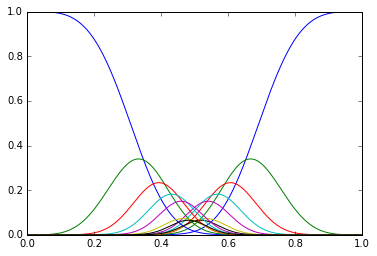

In [5]:
from matplotlib import pyplot
%matplotlib inline
#pyplot.plot(x,game(x))
#pyplot.plot(x,tiebreak(x))
pyplot.plot(x,set60(x))
pyplot.plot(x,set61(x))
pyplot.plot(x,set62(x))
pyplot.plot(x,set63(x))
pyplot.plot(x,set64(x))
pyplot.plot(x,set75(x))
pyplot.plot(x,set76(x))
pyplot.plot(x,set60(1-x))
pyplot.plot(x,set61(1-x))
pyplot.plot(x,set62(1-x))
pyplot.plot(x,set63(1-x))
pyplot.plot(x,set64(1-x))
pyplot.plot(x,set75(1-x))
pyplot.plot(x,set76(1-x))
#pyplot.plot(x,wset(x))

## Naive Estimation

Average score of opponents: $b_i = \frac{\sum n_{ij} a_j}{\sum n_{ij}}$

Then $$w\left(\frac{1}{1-e^{-(a_i - b_i)}}\right) \simeq w_i$$
where $w_i$ is the percentage of games won.
Equivalently:

$$a_i - \frac{\sum n_{ij} a_j}{\sum n_{ij}} = \ln{\left(w^{-1}(w_i)\right)} - \ln{\left(1-w^{-1}(w_i)\right)}$$

Hence, to calculate the first naive estimation we both perform the following operations:
1. calculating the percentage of games won
2. calculate $\ln{\left(w^{-1}(w_i)\right)} - \ln{\left(1-w^{-1}(w_i)\right)}$
3. Get $n_{ij}$
4. solve the system $\left(I - \left(\frac{n_{ij}}{\sum_j n_{ij}}\right)_{ij}\right) x =  \left(\ln{\left(w^{-1}(w_i)\right)} - \ln{\left(1-w^{-1}(w_i)\right)}\right)_i$



## f_logistic
$f(p) = \left(f_1(p),\dots,f_N(p)\right)$

$p(x) = \frac{1}{1+e^x}$

$Y(x) = f(p(x))$

$ln f

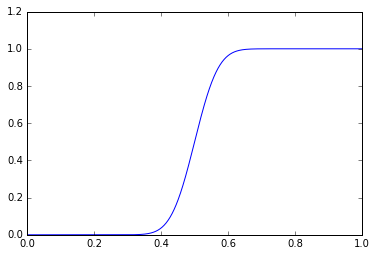